In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, \
f1_score, log_loss, classification_report, roc_curve, auc, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка и предобработка данных

In [2]:
df = pd.DataFrame(data=load_iris()['data'],
                  columns=load_iris()['feature_names'])

df['target'] = load_iris()['target']
df = df[df.target != 2]
target_names = load_iris()['target_names'][:2]

In [3]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [4]:
sc = StandardScaler()

X = df.iloc[:, :-1]
y = df.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, shuffle=True, random_state=10)

In [5]:
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

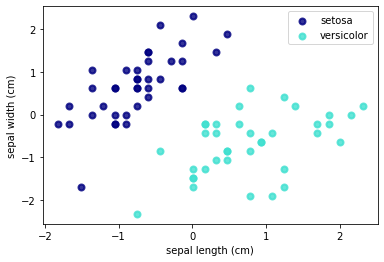

In [6]:
colors = ['navy', 'turquoise']

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_train_std[y_train == i, 0],
                X_train_std[y_train == i, 1],
                color=color,
                alpha=.8,
                lw=2,
                label=target_name)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend()
plt.show()

# Моделирование

## Sigmoid

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [8]:
X_train = torch.FloatTensor(X_train_std)
X_test = torch.FloatTensor(X_test_std)
y_train = torch.LongTensor(y_train.values)
y_test = torch.LongTensor(y_test.values)

In [9]:
X_train_std

array([[ 0.77946848, -0.43030192,  1.12522489,  1.2509701 ],
       [-0.90393858, -0.01117667, -0.93311332, -1.02883522],
       [-0.75090157,  1.03663643, -1.0017246 , -1.02883522],
       [-0.13875355,  0.61751119, -0.79589078, -1.02883522],
       [ 0.32035747, -1.05898978,  0.43911215,  0.3741219 ],
       [ 2.00376453, -0.63986454,  1.33105871,  1.07560046],
       [ 1.85072752, -0.01117667,  1.26244744,  1.2509701 ],
       [ 0.16732046, -0.22073929,  1.12522489,  1.2509701 ],
       [ 1.08554249, -0.43030192,  0.98800234,  0.90023082],
       [-0.75090157,  0.61751119, -0.93311332, -1.02883522],
       [ 0.32035747,  1.45576168, -0.79589078, -0.85346558],
       [ 1.69769052, -0.22073929,  1.05661362,  1.07560046],
       [ 0.16732046, -0.22073929,  0.8507798 ,  0.90023082],
       [-0.75090157, -2.31636551,  0.43911215,  0.3741219 ],
       [-1.3630496 , -0.01117667, -0.93311332, -1.02883522],
       [ 0.77946848, -0.84942716,  1.53689254,  1.42633974],
       [-0.75090157,  0.

In [10]:
X_train

tensor([[ 0.7795, -0.4303,  1.1252,  1.2510],
        [-0.9039, -0.0112, -0.9331, -1.0288],
        [-0.7509,  1.0366, -1.0017, -1.0288],
        [-0.1388,  0.6175, -0.7959, -1.0288],
        [ 0.3204, -1.0590,  0.4391,  0.3741],
        [ 2.0038, -0.6399,  1.3311,  1.0756],
        [ 1.8507, -0.0112,  1.2624,  1.2510],
        [ 0.1673, -0.2207,  1.1252,  1.2510],
        [ 1.0855, -0.4303,  0.9880,  0.9002],
        [-0.7509,  0.6175, -0.9331, -1.0288],
        [ 0.3204,  1.4558, -0.7959, -0.8535],
        [ 1.6977, -0.2207,  1.0566,  1.0756],
        [ 0.1673, -0.2207,  0.8508,  0.9002],
        [-0.7509, -2.3164,  0.4391,  0.3741],
        [-1.3630, -0.0112, -0.9331, -1.0288],
        [ 0.7795, -0.8494,  1.5369,  1.4263],
        [-0.7509,  0.8271, -0.8645, -0.3274],
        [ 2.1568, -0.0112,  1.3997,  1.2510],
        [ 0.0143,  2.2940, -1.0017, -1.0288],
        [-0.4448,  2.0844, -0.9331, -1.2042],
        [-1.6691, -0.2207, -1.0703, -1.0288],
        [-1.0570,  0.6175, -0.8645

Имплементация с использованием numpy

https://www.thomascountz.com/2018/04/05/19-line-line-by-line-python-perceptron

<img src="img/perceptron.png">

In [11]:
class Perceptron(torch.nn.Module):
    def __init__(self):
        super(Perceptron, self).__init__()
        self.linear = nn.Linear(4, 2)

    def forward(self, x):
        output = torch.sigmoid(self.linear(x))
        return output

In [12]:
model = Perceptron()
# Cross Entropy Loss - ф-я потерь
criterion = nn.CrossEntropyLoss()
# Stochastic Gradient Descent
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [13]:
model

Perceptron(
  (linear): Linear(in_features=4, out_features=2, bias=True)
)

In [14]:
y_pred = model(X_test)
before_train = criterion(y_pred, y_test)
print('Test loss before training' , before_train.item())

Test loss before training 0.6852498054504395


In [15]:
import tqdm
import numpy as np
EPOCHS = 1000
volume = []

for epoch in tqdm.trange(1, EPOCHS):

    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    
    if epoch%100==0:
        print('Epoch {:}'.format(epoch + 1))
        print('train loss: {}'.format(loss.item()), '\n', '-'*50)

    # вычисление градиентов
    loss.backward()
    # обновляем веса
    optimizer.step()
    
    # устанавливаем градиенты равными нулю
    # PyTorch накапливает градиенты при последующих обратных проходах
    optimizer.zero_grad()
    
    with torch.no_grad():
        y_pred = model(X_test)
        loss_test = criterion(y_pred, y_test)
        accuracy = (torch.argmax(y_pred, dim=1) == y_test).sum().item() / y_pred.shape[0]   
        volume.append([epoch, loss.data.item(), loss_test.data.item(), accuracy])

 49%|████▉     | 490/999 [00:00<00:00, 1089.57it/s]

Epoch 101
train loss: 0.6123418211936951 
 --------------------------------------------------
Epoch 201
train loss: 0.554364800453186 
 --------------------------------------------------
Epoch 301
train loss: 0.5114781856536865 
 --------------------------------------------------
Epoch 401
train loss: 0.47977057099342346 
 --------------------------------------------------
Epoch 501
train loss: 0.4559462070465088 
 --------------------------------------------------


100%|██████████| 999/999 [00:00<00:00, 1843.13it/s]

Epoch 601
train loss: 0.437651664018631 
 --------------------------------------------------
Epoch 701
train loss: 0.4232879877090454 
 --------------------------------------------------
Epoch 801
train loss: 0.4117755889892578 
 --------------------------------------------------
Epoch 901
train loss: 0.40237686038017273 
 --------------------------------------------------


Last accuracy 1.000


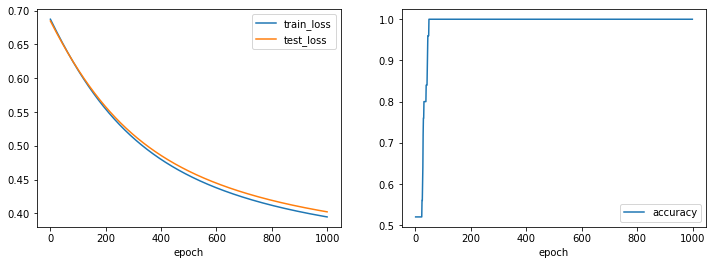

In [16]:
volume_ = pd.DataFrame(volume, columns=[
    "epoch", "train_loss", "test_loss", "accuracy"]).set_index("epoch")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

print("Last accuracy %.3f" % volume_.accuracy.iloc[-1])
volume_[["train_loss", "test_loss"]].plot(ax=ax1)
volume_[["accuracy"]].plot(ax=ax2);

## ReLU

In [17]:
class Perceptron_RL(torch.nn.Module):
    def __init__(self):
        super(Perceptron_RL, self).__init__()
        self.linear = nn.Linear(4, 2)

    def forward(self, x):
        output = torch.relu(self.linear(x))
        return output

In [18]:
model = Perceptron_RL()
# Cross Entropy Loss
criterion = nn.CrossEntropyLoss()
# Stochastic Gradient Descent
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [19]:
model

Perceptron_RL(
  (linear): Linear(in_features=4, out_features=2, bias=True)
)

In [20]:
y_pred = model(X_test)
before_train = criterion(y_pred, y_test)
print('Test loss before training' , before_train.item())

Test loss before training 0.8413470387458801


In [21]:
import tqdm
import numpy as np
EPOCHS = 1000
volume = []

for epoch in tqdm.trange(1, EPOCHS):

    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    
    if epoch%100==0:
        print('Epoch {:}'.format(epoch + 1))
        print('train loss: {}'.format(loss.item()), '\n', '-'*50)

    # вычисление градиентов
    loss.backward()
    # обновляем веса
    optimizer.step()
    
    # устанавливаем градиенты равными нулю
    optimizer.zero_grad()
    
    with torch.no_grad():
        y_pred = model(X_test)
        loss_test = criterion(y_pred, y_test)
        accuracy = (torch.argmax(y_pred, dim=1) == y_test).sum().item() / y_pred.shape[0]   
        volume.append([epoch, loss.data.item(), loss_test.data.item(), accuracy])

 33%|███▎      | 330/999 [00:00<00:00, 1631.42it/s]

Epoch 101
train loss: 0.43205952644348145 
 --------------------------------------------------
Epoch 201
train loss: 0.2544947862625122 
 --------------------------------------------------
Epoch 301
train loss: 0.18191081285476685 
 --------------------------------------------------
Epoch 401
train loss: 0.14140354096889496 
 --------------------------------------------------


 72%|███████▏  | 719/999 [00:00<00:00, 1780.96it/s]

Epoch 501
train loss: 0.11547697335481644 
 --------------------------------------------------
Epoch 601
train loss: 0.09752600640058517 
 --------------------------------------------------
Epoch 701
train loss: 0.08438145369291306 
 --------------------------------------------------
Epoch 801
train loss: 0.07434849441051483 
 --------------------------------------------------
Epoch 901
train loss: 0.0664425790309906 
 --------------------------------------------------


100%|██████████| 999/999 [00:00<00:00, 1882.21it/s]


Last accuracy 1.000


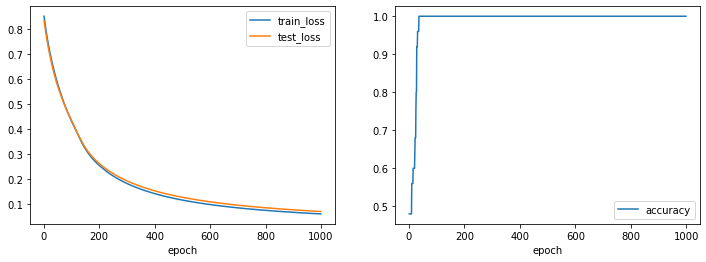

In [22]:
volume_ = pd.DataFrame(volume, columns=[
                      "epoch", "train_loss", "test_loss", "accuracy"]).set_index("epoch")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

print("Last accuracy %.3f" % volume_.accuracy.iloc[-1])
volume_[["train_loss", "test_loss"]].plot(ax=ax1)
volume_[["accuracy"]].plot(ax=ax2);

## ROC-AUC

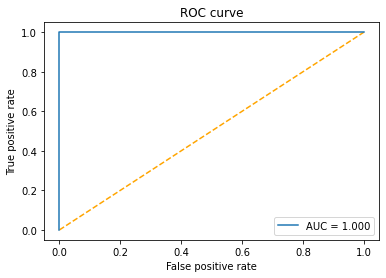

In [23]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import OneHotEncoder

#plt.figure(figsize=(6, 6))
plt.plot([0, 1], [0, 1], 'k--', color='orange')

with torch.no_grad():
    y_pred = model(X_test).numpy()
    fpr, tpr, threshold = roc_curve(y_test, y_pred[:, 1])

plt.plot(fpr, tpr, label='AUC = {:.3f}'.format(auc(fpr, tpr)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend();